<a href="https://colab.research.google.com/github/Ary1709/Inteligencia-artificial-1843799/blob/main/PIA_IA_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ariana Guadalupe Villegas Peña, 1843799, IMTC
Omar Josafat Villarreal Márquez, 1934287, IMTC
Pedro Estrada Sandoval, 1758756, IMTC



In [ ]:
# importar librerías 
import tensorflow as tf
from tensorflow import keras
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import cv2
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

0

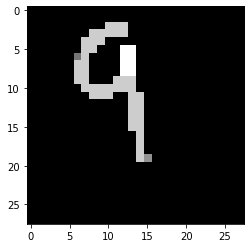

In [ ]:
# Cargar imagen de prueba
i=0
f=0
label=[]
# Formato de imagen
imagenes_dataset = []
etiquetas_dataset = []
while(i<100):

  file = '/content/'+str(i)+'.png'
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  # Preview de imagen reformateada
  Numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized, cmap='gray')
  if(f==9):
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(f)
    
    f=0
  else :
    imagenes_dataset.append(img_resized)
    etiquetas_dataset.append(f)
   
    f=f+1
  i=i+1

0

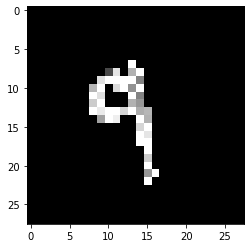

In [ ]:
# para las test
i=100
f=0
imagenestest_dataset = []
etiquetastest_dataset = []
while(i<200):

  file = '/content/'+str(i)+'.png'
  test_image = cv2.imread(file, cv2.IMREAD_GRAYSCALE )
  img_resized = cv2.resize(test_image, (28,28), )
  img_resized = cv2.bitwise_not(img_resized)

  # Preview de imagen reformateada
  Numeros='/content/'+str(i)+'.png'
  plt.imshow(img_resized, cmap='gray')
  if(f==9):
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
    
    f=0
  else :
    imagenestest_dataset.append(img_resized)
    etiquetastest_dataset.append(f)
   
    f=f+1
  i=i+1


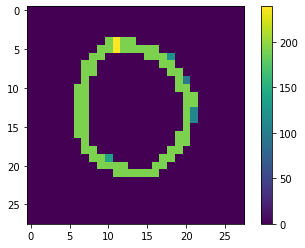

In [ ]:
plt.figure()
plt.imshow(imagenes_dataset[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
len(etiquetas_dataset)

100

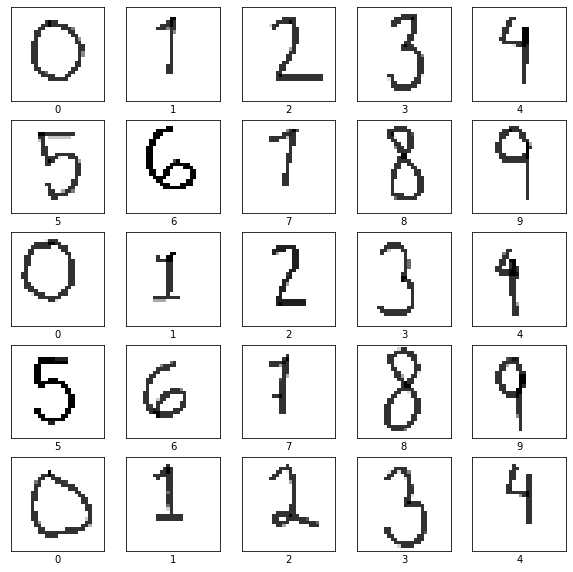

In [ ]:
plt.figure(figsize=(10,10))
for j in range(25):
    plt.subplot(5,5,j+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(imagenes_dataset[j], cmap=plt.cm.binary)
    plt.xlabel(etiquetas_dataset[j])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

newetiqueta=np.array(etiquetas_dataset)
newetiquetatest=np.array(etiquetastest_dataset)
imagenesne=np.array(imagenes_dataset)
imagenesnetest=np.array(imagenestest_dataset)


In [ ]:
newetiqueta.shape

(100,)

In [ ]:
imagenesne.shape

(100, 28, 28)

In [ ]:
model.fit(imagenesne, newetiqueta, epochs=10)

Epoch 1/10
4/4 [==============================] - 1s 6ms/step - loss: 83.9546 - accuracy: 0.1400
Epoch 2/10
4/4 [==============================] - 0s 6ms/step - loss: 24.7145 - accuracy: 0.4600
Epoch 3/10
4/4 [==============================] - 0s 7ms/step - loss: 8.4006 - accuracy: 0.7300
Epoch 4/10
4/4 [==============================] - 0s 8ms/step - loss: 1.8267 - accuracy: 0.9000
Epoch 5/10
4/4 [==============================] - 0s 5ms/step - loss: 0.2216 - accuracy: 0.9800
Epoch 6/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0206 - accuracy: 0.9900
Epoch 7/10
4/4 [==============================] - 0s 6ms/step - loss: 0.0401 - accuracy: 0.9900
Epoch 8/10
4/4 [==============================] - 0s 5ms/step - loss: 0.0024 - accuracy: 1.0000
Epoch 9/10
4/4 [==============================] - 0s 6ms/step - loss: 2.2552e-06 - accuracy: 1.0000
Epoch 10/10
4/4 [==============================] - 0s 5ms/step - loss: 6.4090e-06 - accuracy: 1.0000


In [ ]:
test_loss, test_acc = model.evaluate(imagenesnetest, newetiquetatest, verbose=2)

print('\nTest accuracy:', test_acc)

7/7 - 0s - loss: 39.9920 - accuracy: 0.5850 - 32ms/epoch - 5ms/step

Test accuracy: 0.5849999785423279


In [ ]:
predictions = model.predict(imagenesnetest)

4/4 [==============================] - 0s 4ms/step


In [ ]:
predictions[0]

array([0.0000000e+00, 0.0000000e+00, 2.8663299e-03, 0.0000000e+00,
       0.0000000e+00, 8.2859759e-16, 0.0000000e+00, 0.0000000e+00,
       9.9713361e-01, 0.0000000e+00], dtype=float32)

In [ ]:
np.argmax(predictions[0])

8

In [ ]:
newetiquetatest[0]

0

In [ ]:
class_names=('0','1','2','3','4','5','6','7','8','9')

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

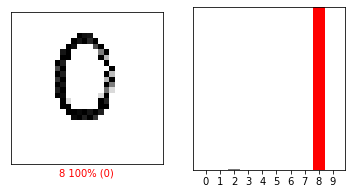

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

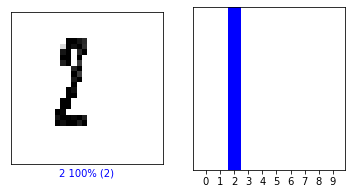

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  newetiquetatest)
plt.show()

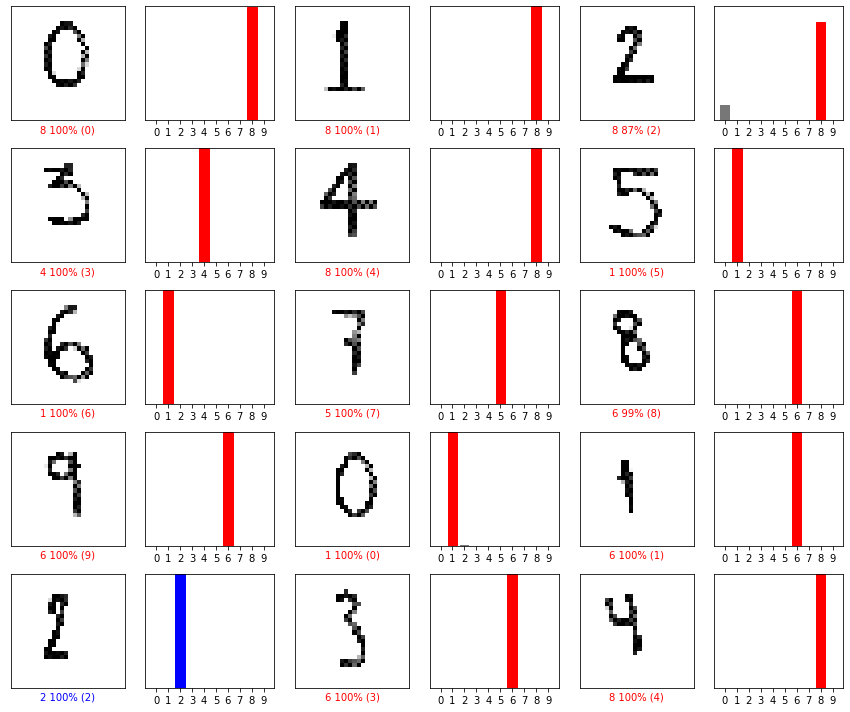

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], newetiquetatest, imagenesnetest)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], newetiquetatest)
plt.tight_layout()
plt.show()

In [ ]:
img = imagenesnetest[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = model.predict(img)

print(predictions_single)

1/1 [==============================] - 0s 19ms/step
[[0.0000000e+00 8.9183116e-22 1.5105483e-13 5.2005010e-28 6.2675049e-34
  0.0000000e+00 8.3535774e-08 3.5870491e-27 9.9999988e-01 0.0000000e+00]]


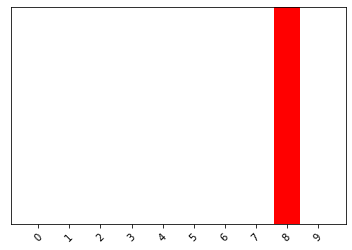

In [ ]:
plot_value_array(1, predictions_single[0], newetiquetatest)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

8